In [21]:
# Import required libraries
import cv2
import imutils
import numpy as np
import argparse
from google.colab.patches import cv2_imshow

# Initialize the HOG descriptor
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [22]:
def detect(frame):
    bounding_box_cordinates, weights = HOGCV.detectMultiScale(frame, winStride=(4, 4), padding=(8, 8), scale=1.03)
    person = 1
    for x,y,w,h in bounding_box_cordinates:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(frame, f'person {person}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        person += 1

    cv2.putText(frame, 'Status : Detecting ', (40,40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    cv2.putText(frame, f'Total Persons : {person-1}', (40,70), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    return frame

def detectByPathVideo(path, writer):
    video = cv2.VideoCapture(path)
    check, frame = video.read()
    if check == False:
        print('Video Not Found. Please Enter a Valid Path (Full path of Video Should be Provided).')
        return

    print('Detecting people...')
    frame_count = 0

    while video.isOpened():
        check, frame = video.read()
        if check:
            frame = imutils.resize(frame, width=min(800,frame.shape[1]))
            frame = detect(frame)

            if writer is not None:
                writer.write(frame)

            if frame_count % 30 == 0:
                cv2_imshow(frame)

            frame_count += 1
        else:
            break

    video.release()

def detectByPathImage(path, output_path):
    print(f"Reading image from: {path}")
    image = cv2.imread(path)

    if image is None:
        print(f"Error: Could not read image from {path}")
        return

    image = imutils.resize(image, width=min(800, image.shape[1]))
    result_image = detect(image)

    cv2_imshow(result_image)

    if output_path is not None:
        cv2.imwrite(output_path, result_image)
        print(f"Output saved to: {output_path}")

def humanDetector(args):
    # Extract paths from args
    image_path = args.get("image", None)
    video_path = args.get("video", None)
    output_path = args.get("output", None)

    writer = None
    if output_path is not None and image_path is None:
        writer = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'MJPG'), 10, (600,600))

    if video_path is not None:
        print('[INFO] Opening Video from path.')
        detectByPathVideo(video_path, writer)
    elif image_path is not None:
        print('[INFO] Opening Image from path.')
        detectByPathImage(image_path, output_path)
    else:
        print("Error: Please provide either an image or video path")

[INFO] Opening Image from path.
Reading image from: /content/images.jpg


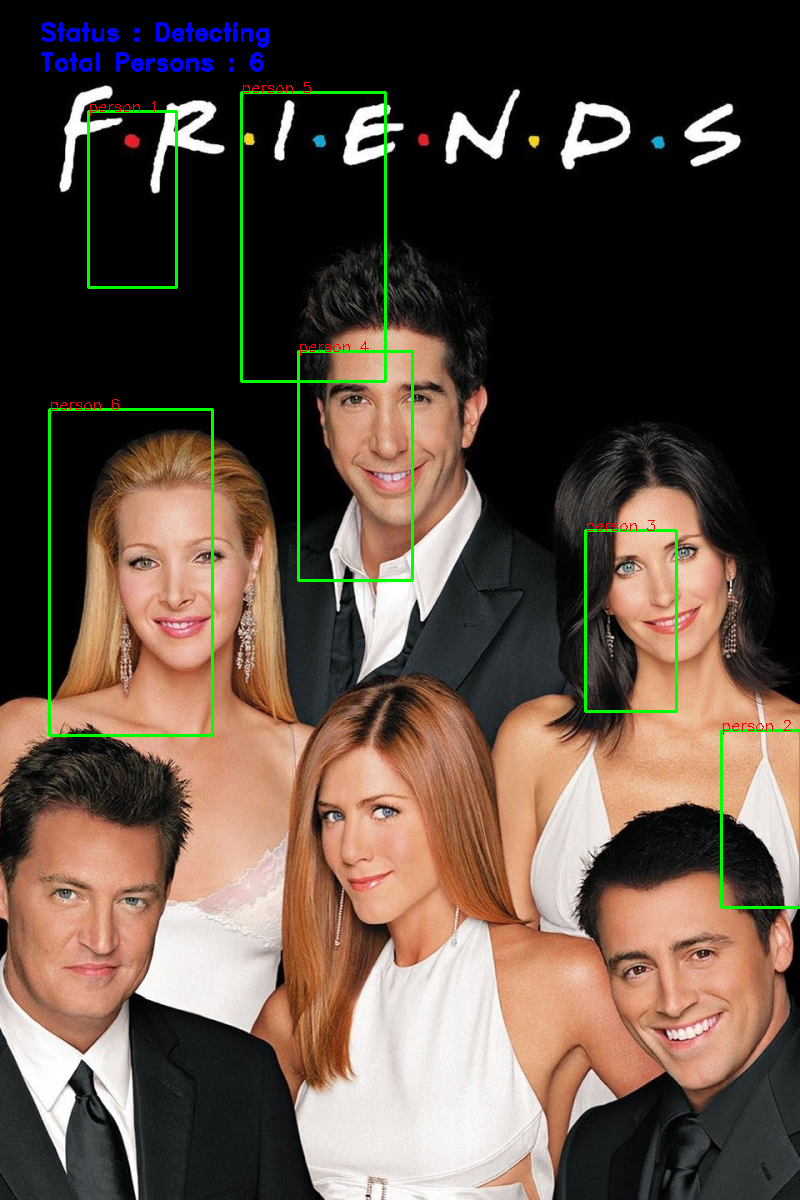

Output saved to: detected_output.jpg


In [23]:
# Replace 'your_image.jpg' with your actual image filename
args = {
    'image': '/content/images.jpg',  # Update this path
    'video': None,
    'output': 'detected_output.jpg'
}
humanDetector(args)